[Source walkthroug](https://stat.ethz.ch/~meierluk/teaching/anova/contrasts-and-multiple-testing.html)

In [1]:
treat.ord= rep(c("A", "B", "C", "D"), each = 5)
treat.ord

[1] "A" "A" "A" "A" "A" "B" "B" "B" "B" "B" "C" "C" "C" "C" "C" "D" "D" "D" "D"
[20] "D"

In [7]:
tread.ord

[1] "A" "A" "A" "A" "A" "B" "B" "B" "B" "B" "C" "C" "C" "C" "C" "D" "D" "D" "D"
[20] "D"

In [2]:
## random sample
sample(treat.ord)

[1] "A" "B" "D" "A" "B" "C" "B" "C" "C" "B" "A" "D" "C" "A" "A" "C" "D" "D" "D"
[20] "B"

## 3.1.2 Parameter Estimation 


\begin{align*}
  y_{i\cdot}      & = \sum_{j=1}^{n_i} y_{ij} & \textrm{sum of group $i$}\\
  y_{\cdot \cdot} & = \sum_{i=1}^g \sum_{j=1}^{n_i} y_{ij} & 
    \textrm{sum of all observations}\\
  \overline{y}_{i\cdot} & = \frac{1}{n_i} \sum_{j=1}^{n_i} y_{ij} & 
    \textrm{mean of group $i$}\\
  \overline{y}_{\cdot\cdot} & = \frac{1}{N} \sum_{i=1}^g \sum_{j=1}^{n_i} y_{ij} & 
    \textrm{overall (or total) mean}
\end{align*}

In [3]:
data(PlantGrowth)
str(PlantGrowth)

'data.frame':	30 obs. of  2 variables:
 $ weight: num  4.17 5.58 5.18 6.11 4.5 4.61 5.17 4.53 5.33 5.14 ...
 $ group : Factor w/ 3 levels "ctrl","trt1",..: 1 1 1 1 1 1 1 1 1 1 ...


We can see that `group` is a __categorical predictor__ having three levels, which the first level is `cntl` or control. lets evaluate more details about the factors in this dataset:

In [4]:
levels(PlantGrowth$group)

[1] "ctrl" "trt1" "trt2"

Plot Data

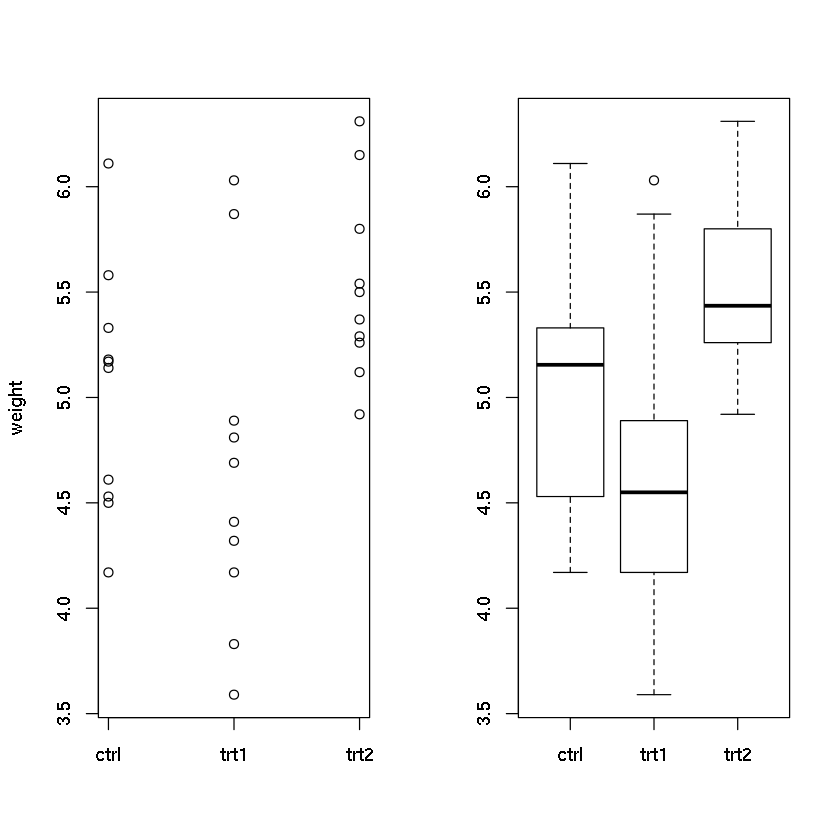

In [5]:
par(mfrow = c(1,2))  # split the plot
stripchart(weight ~ group, vertical = TRUE, pch = 1, data=PlantGrowth)
boxplot(weight ~ group, data = PlantGrowth)

Here we are calling the __categorical predictor__ or factors within the `group` according to our response variable (weight) using the below equation:

\begin{equation}
  \mu_i = \mu + \alpha_i
  \tag{3.3}
\end{equation}

Where - We also call $α_i$ the $i$th treatment effect. and we can think of $μ$ as a "global mean" and $α_i$ as a _"deviaiton from the global mean due to the $i$th treatment"_

Next we fit the ANOVA model using the `aov` function. We state the model using the formula notation where the response is listed on the left-hand side and the (only) predictor is on the right hand side of the tilde sign `~`. Then use call the `coef` function to __estimate the parameters__

In [6]:
fit = aov(weight ~ group, data = PlantGrowth)

coef(fit) # print the estimated coefficients

(Intercept)   grouptrt1   grouptrt2 
      5.032      -0.371       0.494

In [7]:
dummy.coef(fit)

Full coefficients are 
                                    
(Intercept):     5.032              
group:            ctrl   trt1   trt2
                 0.000 -0.371  0.494

The `(intercept)` corresponds to μ = 5.032 which is the estimated value of the expected value of the _reference group_ `ctl` bcause by default we use `control.treatement` and the frist level is the refeference group.

From there we thave the `grouptr1` which is $\widehat{\alpha}_2 = -0.371$. __This means that the difference group `trt1` to group `ctrl` is estimated to be -0.371.__

The last column is `grouptr2` which is $\widehat{\alpha}_3 = 0.494$. This is the difference of group `trt2` to group `ctrl`. 

Hense for all levels except the reference level we see difference to the reference group while estimate of the reference level can be found in the column `(intercept)`

We can also get $\widehat{\mu}_i$ which is the __predicted value per treatement group__ we can also obtain this value by using the `predict` function on the `fit` object. The `fit` objuct contains all information about the estimated model. 

In [8]:
predict(fit, newdata = data.frame(group = c("ctrl", "trt1", "trt2")))

1     2     3 
5.032 4.661 5.526

In [9]:
5.032-0.371

[1] 4.661

Say we want to change the side-constrate to sum-to-zero, we use the `contr.sum` option to change the encoding on the global level

In [10]:
options(contrasts = c("contr.sum", "contr.poly"))
fit2 = aov(weight ~ group, data = PlantGrowth)
coef(fit2)

(Intercept)      group1      group2 
      5.073      -0.041      -0.412

In [11]:
dummy.coef(fit2)

Full coefficients are 
                                    
(Intercept):     5.073              
group:            ctrl   trt1   trt2
                -0.041 -0.412  0.453

We get different values because the meaning of the parameters has changed. 

In [12]:
predict(fit2, newdata = data.frame(group = c("ctrl", "trt1", "trt2")))

1     2     3 
5.032 4.661 5.526

we can compare the `predict` output from `fit` and `fit2` and see that the predictions have not change. Therefore, predicted values do not depend on _side contraint_, but _side contraint_ has a large impact on the meaning of the parameters of the model.

Next we run the `summary` function to get the ANOVA table and the p-value

In [13]:
summary(fit)

            Df Sum Sq Mean Sq F value Pr(>F)  
group        2  3.766  1.8832   4.846 0.0159 *
Residuals   27 10.492  0.3886                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

we get the p-value = 0.0159, hence we __reject the null hypothesis__ on a 5% significance level. 

We can also perform the f-test  by using the `drop1` function which performs a test whether a single term/factor can be dropped form the model

In [14]:
drop1(fit, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,10.49209,-25.51727,NA,NA
group,2,3.76634,14.25843,-20.31547,4.846088,0.01590996


we get the same p-value.

compare two different models

In [15]:
# fit single mean model
fit.single = aov(weight ~ 1, data = PlantGrowth) # 1 means global mean (intercept)

anova(fit.single, fit) # compare with cell means model

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
29,14.25843,NA,NA,NA,NA
27,10.49209,2,3.76634,4.846088,0.01590996


In [41]:
PlantGrowth$weight

[1] 4.17 5.58 5.18 6.11 4.50 4.61 5.17 4.53 5.33 5.14 4.81 4.17 4.41 3.59 5.87
[16] 3.83 6.03 4.89 4.32 4.69 6.31 5.12 5.54 5.50 5.37 5.29 4.92 6.15 5.80 5.26

same p-value

To perform statistical inference for individual factor groups we can use `summary.lm` for test and `confint` for confidence intervals

In [16]:
summary.lm(fit)


Call:
aov(formula = weight ~ group, data = PlantGrowth)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4180 -0.0060  0.2627  1.3690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0320     0.1971  25.527   <2e-16 ***
grouptrt1    -0.3710     0.2788  -1.331   0.1944    
grouptrt2     0.4940     0.2788   1.772   0.0877 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6234 on 27 degrees of freedom
Multiple R-squared:  0.2641,	Adjusted R-squared:  0.2096 
F-statistic: 4.846 on 2 and 27 DF,  p-value: 0.01591


In [17]:
confint(fit)

,2.5 %,97.5 %
(Intercept),4.62752600,5.4364740
grouptrt1,-0.94301261,0.2010126
grouptrt2,-0.07801261,1.0660126


interpretaiton of output is highly based on side-constraint being used however can be read as such: confidence interval -0.943, 0.201 for the difference between `trt1` and `ctrl`

## Checking Assumptions (Residual Analysis)

Our test are only valid if the model assumptions hold true. We can validate the assumptions by asking the following questions:

* are the errors independent? (most important)
* are the errors normally distributed?
* is the error variance constant?
* do the errors have mean zero? (for anova not as critical as anova is resistant as were are typically fitting large models)

The easiest method to assess the validity of these assumptions are to check visually:

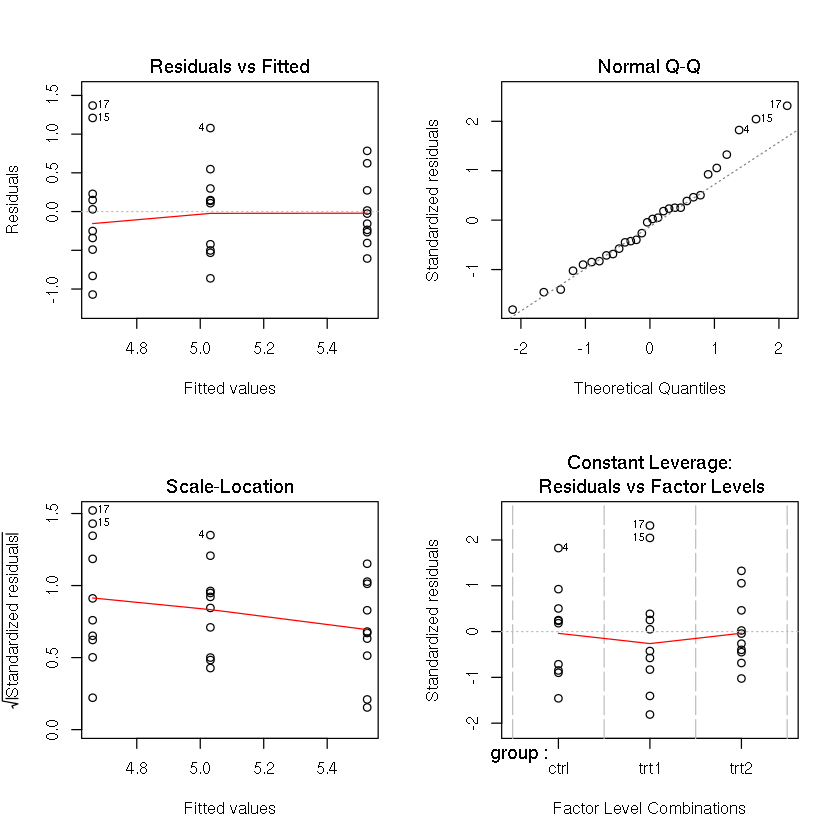

In [18]:
par(mfrow = c(2,2))
plot(fit)

#### QQ Plot
The plot should show a more or less straight line if the distributional assumption is correct. By default, a standard normal distribution is the theoretical “reference distribution”.

#### Residuals vs Fitted

plots the residuals rij vs. the fitted values μ^i. It allows us to check whether the residuals have constant variance and whether the residuals have mean zero (i.e. they don’t show any deterministic pattern).

In [19]:
PlantGrowth[c(1, 2, 11, 12, 21, 22),]

,weight,group
1,4.17,ctrl
2,5.58,ctrl
11,4.81,trt1
12,4.17,trt1
21,6.31,trt2
22,5.12,trt2


## Post Hoc Testing (Contrast / Multiple Testing)

The F-test is unspecific - it basically gives us a yes/no answer for the question _"is there any treatment effect at all?"_. It does not tell us what specific treatment (or treatment combination) is significant. 

A contrast is a set of weights (a vector) that defines a specific comparison over scores or means. They are used, among other things, to test more focused hypotheses than the overall omnibus test of the ANOVA.

In [18]:
library(multcomp)

ERROR: Error in library(multcomp): ‘multcomp’ is not a valid installed package


In [13]:
install.packages("multcomp", dependencies = TRUE)

Installing package into ‘/home/redne/1. R/SMU/C:/Users/Documents/R/win-library/3.5’
(as ‘lib’ is unspecified)
also installing the dependencies ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘coin’, ‘car’, ‘coxme’, ‘SimComp’

Warning message in install.packages("multcomp", dependencies = TRUE):
“installation of package ‘pbkrtest’ had non-zero exit status”Warning message in install.packages("multcomp", dependencies = TRUE):
“installation of package ‘quantreg’ had non-zero exit status”Warning message in install.packages("multcomp", dependencies = TRUE):
“installation of package ‘maptools’ had non-zero exit status”Warning message in install.packages("multcomp", dependencies = TRUE):
“installation of package ‘coxme’ had non-zero exit status”Warning message in install.packages("multcomp", dependencies = TRUE):
“installation of package ‘multcomp’ had non-zero exit status”Warning message in install.packages("multcomp", dependencies = TRUE):
“installation of package ‘coin’ had non-zero exit status”Warning

In [20]:
install.packages("maptools")

Installing package into ‘/home/redne/1. R/SMU/C:/Users/Documents/R/win-library/3.5’
(as ‘lib’ is unspecified)
Warning message in install.packages("maptools"):
“installation of package ‘maptools’ had non-zero exit status”

In [49]:
install.packages("maptools")

ERROR: Error in glht(fit, linfct = mcp(group = c(1, -1/2, -1/2))): could not find function "glht"
